In [1]:
import numpy as np
import os
import sys
import random
import torch
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path+"/models")
sys.path.append(module_path+"/train")
sys.path.append(module_path+"/datasets")

from factor_vae import FactorVAEDSprites, Discriminator
from datasets import train_test_random_split, load_dsprites, CustomDSpritesDatasetFactorVAE
from train import train_factor_vae, test_factor_vae
from entanglement_metric import entanglement_metric_factor_vae

In [2]:
dataset = load_dsprites("../datasets/dsprites.npz",False)

In [3]:
data_size = 1000
data_ = CustomDSpritesDatasetFactorVAE(dataset,data_size)

In [4]:
data_train, data_test = train_test_random_split(data_, 0.8)

In [5]:
batch_size = 64
train_loader = DataLoader(data_train, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(data_test, batch_size=batch_size,shuffle=False)

In [6]:
model = FactorVAEDSprites()
discriminator = Discriminator(nb_layers=4,hidden_dim=500)
vae_optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=1e-4)
gamma = 0
epochs = 3

In [7]:
train_losses_list, recon_losses_list, kl_divs_list, tc_losses_list, discriminator_losses_list = train_factor_vae(model, discriminator, epochs, train_loader, vae_optimizer, discriminator_optimizer, gamma, 'bernoulli')

/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 0 finished, loss: 2621.130314753606, recon loss: 2621.102013221154, kl div: 0.02831033790537801, TC loss: 0.01050333076944718, discriminator loss: 0.693788964014787
Epoch 1 finished, loss: 1180.8052086463342, recon loss: 1179.5116624098557, kl div: 1.293528472001736, TC loss: -0.08159983673920998, discriminator loss: 0.6898844929841849
Epoch 2 finished, loss: 650.5706082857572, recon loss: 643.7320697490985, kl div: 6.838535859034612, TC loss: 0.13081156997941434, discriminator loss: 0.6163269327237055


In [8]:
def plot_loss(loss_list, title):
    plt.plot(np.arange(1,len(loss_list)+1, 1), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training "+title)
    plt.show()

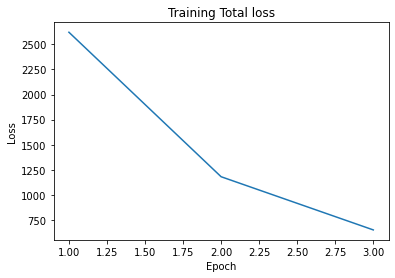

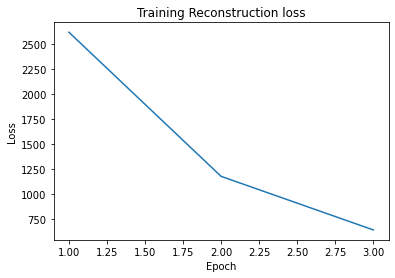

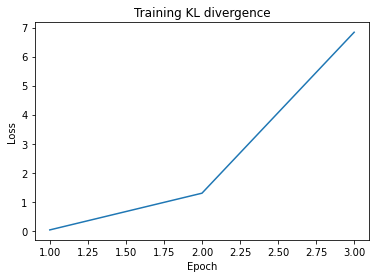

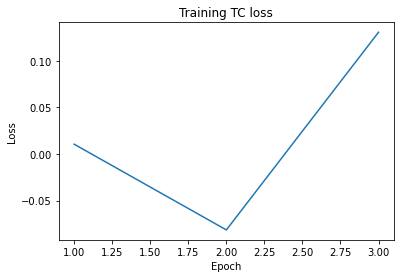

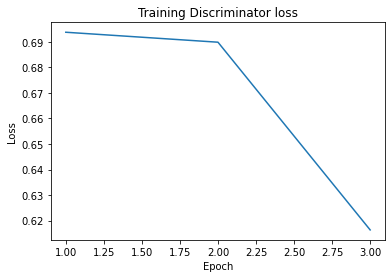

In [9]:
plot_loss(train_losses_list, "Total loss")
plot_loss(recon_losses_list, "Reconstruction loss")
plot_loss(kl_divs_list, "KL divergence")
plot_loss(tc_losses_list, "TC loss")
plot_loss(discriminator_losses_list, "Discriminator loss")

In [10]:
test_factor_vae(model, discriminator, test_loader, gamma, 'bernoulli')

Test loss: 648.2163391113281


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


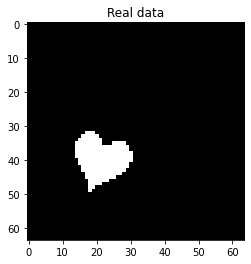

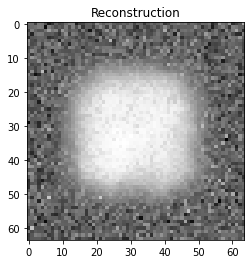

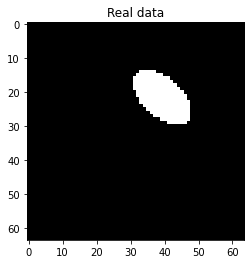

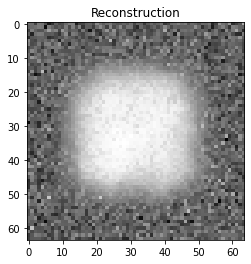

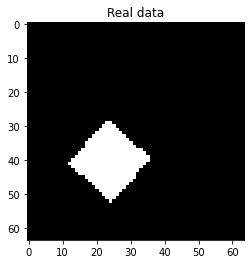

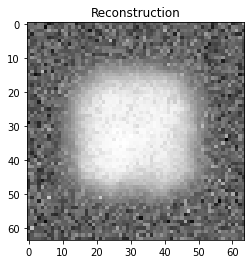

In [11]:
device = None
with torch.no_grad():
    for i in [1,2,20]:
        data, _ = data_test[i]
        data = data.float()
        if device != None:
            data = data.to(device)
        recon, mu, logvar, z = model(data)
        plt.imshow(data.cpu(), cmap='Greys_r')
        plt.title("Real data")
        plt.show()
        plt.imshow(recon.squeeze().cpu(), cmap='Greys_r')
        plt.title("Reconstruction")
        plt.show()

In [12]:
entanglement_metric_factor_vae(model, data_, 10, 50)

0
1
2
3
4
5
6
7
8
9
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 4. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


0.0